In [1]:
import engine as ng
import test_suite as tst
import matplotlib.pyplot as plt

In [2]:
## Diagnostics de performance
import numpy as np
def diffAbs(uFinal,uRef):
	return (1/uFinal.shape[0]**.5)*np.sum((uFinal - uRef)**2)**.5

In [3]:
def conservation(uFinal,uRef,scheme):
	integ0 = 2*np.sum(uFinal*scheme.dx)
	integ1 = 2*np.sum(uRef*scheme.dx)
	return integ1 - integ0

### Nous testons ici deux variantes du schéma MUSCL, KT et KT parabolic, créées par Kurganov et Tadmor en 2000 et par Kermani et al, en 2003. 

test 1

Erreur RMS:  0.398807514588903
Erreur de conservation :  -8.344019919448442e-16


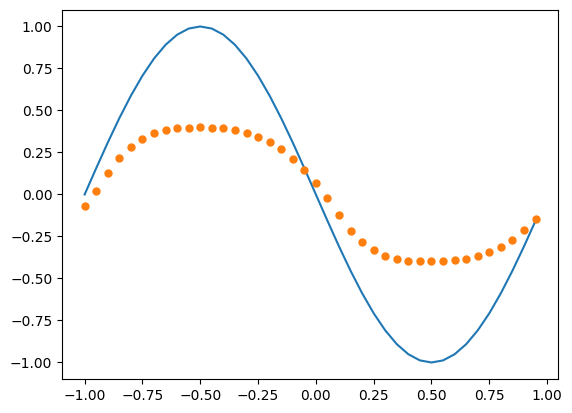

In [4]:
test = tst.Test1()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

Erreur RMS:  0.4445113870229186
Erreur de conservation :  -3.469446951953614e-17


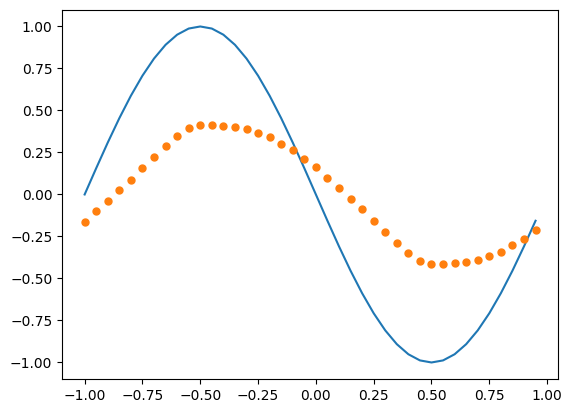

In [5]:
test = tst.Test1()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 2

Erreur RMS:  0.20444746653752718
Erreur de conservation :  2.220446049250313e-16


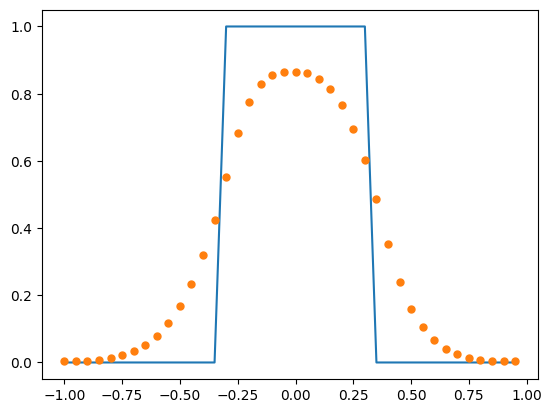

In [6]:
test = tst.Test2()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

Erreur RMS:  0.21640370479827015
Erreur de conservation :  2.220446049250313e-16


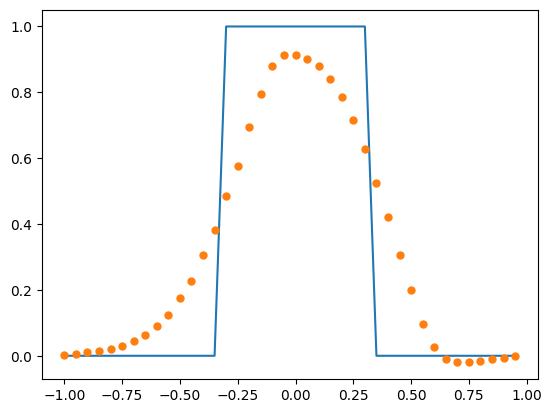

In [7]:
test = tst.Test2()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 3

Erreur RMS:  0.0820583761320583
Erreur de conservation :  0.0


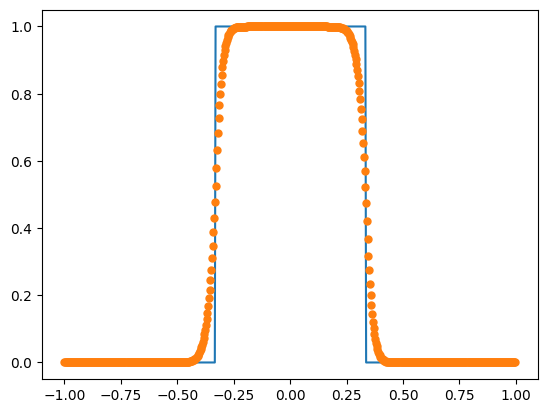

In [8]:
test = tst.Test3()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 4

Erreur RMS:  0.052716084081588226
Erreur de conservation :  2.220446049250313e-16


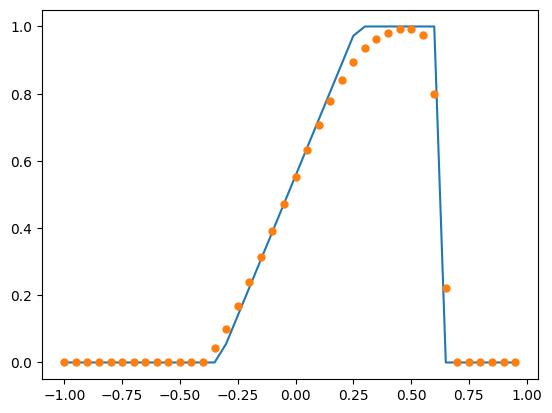

In [9]:
test = tst.Test4()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 4 - interpolation du 2nd ordre

Erreur RMS:  0.051282622663336275
Erreur de conservation :  2.220446049250313e-16


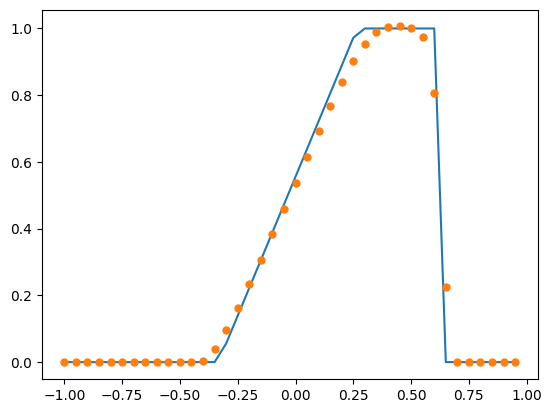

In [10]:
test = tst.Test4()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 5

Erreur RMS:  0.07065925727950359
Erreur de conservation :  0.0


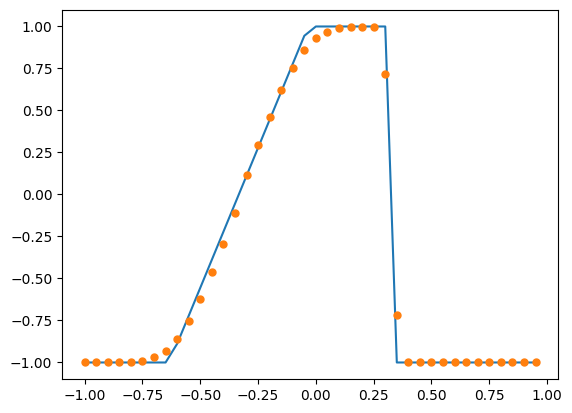

In [11]:
test = tst.Test5()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 5 - interpolation du 2nd ordre

Erreur RMS:  0.05884860317355285
Erreur de conservation :  0.0


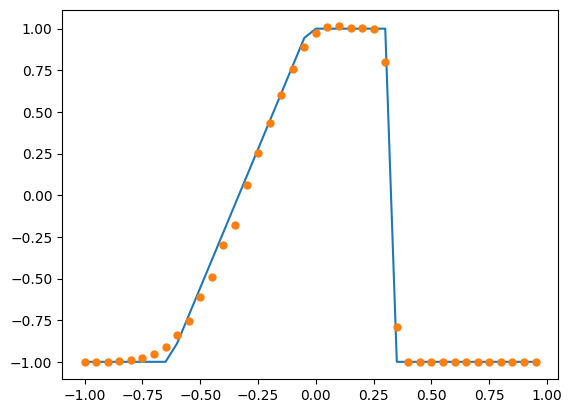

In [12]:
test = tst.Test5()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

Nous implémentons la variante de Kurganov-Tadmor du schéma MUSCL. Ce schéma ne comporte pas de solveur de Riemann et fait usage d'un limiteur de flux. Ce schéma reconstruit l'évolution spatiale par des polynômes, originellement par des droites entre deux points d'interpolation (testée avec le schéma KT, Kurganov et Tadmor, 2000), mais peut aussi être fait en utilisant une reconstruction parabolique (testée avec le schéma KT parabolique, Kermani et al, 2003).

Ainsi, nous identifions trois paramètres principaux influant sur la qualité des simulations : la condition de CFL, le choix du flux limiter, et l'ordre de l'interpolation lors de la reconstruction. Pour évaluer la qualité des simulations, nous utilisons deux mesures : la variance de l'erreur à la solution analytique et l'erreur sur la conservation de l'inconnue u, dont l'intégrale doit rester constante.

## CFL = 0.8

Pour que l'ensemble des tests convergent, **pour CFL = 0.8, nous sommes contraints d'implémenter une intégration en temps de Runge-Kutta 4 (cf. lignes 238 - 262 de engine.py)**. L'inconvénient d'une telle méthode est qu'elle est plus coûteuse en temps, car l'intégration temporelle nécessite plus d'opérations. Dès lors

- Pour l'équation d'advection, l'erreur RMS demeure importante (~ 0.4 quel que soit le flux limiter). La performance de la reconstruction linéaire et meilleure dans ce cas.

- Pour l'équation de Burgers, la reconstruction du second ordre offre au countraire une meilleure performance.

- Dans tous les cas, l'erreur de conservation est de l'ordre de l'erreur machine (~ $10^{-16}$)

## CFL = 0.5

**Diminuer le CFL nous permet d'utiliser le schéma d'intégration original en une étape (cf. ligne 266 de engine.py)**. Dans ce cas, la qualité du calcul est grandement améliorée :

- Pour l'équation d'advection, l'erreur RMS chute à environ 6 \%, sauf pour le cas sinusoïdal où les gradients sont fortement accentués. De ce fait, la reconstruction du 2nd ordre génère des oscillations indésirables.

- Pour l'équation de Burgers, l'interpolation du 2nd ordre perd son avantage sur la reconstruction linéaire.

- L'erreur de conservation demeure très faible dans tous les cas.

## Bilan

En comparant le schéma KT au schéma KT parabolique, l'oscillation créée pour les chocs 4 et 5 dans le cas du schéma KT parabolique semble être créée par l'utilisation du flux superbee : en utilisant le flux van Albada $\text{max}(0,(r+r^2)/(1+r^2))$, les oscillations sont réduites côté amont du choc et quelques oscillations apparaissent côté aval. Le schéma KT parabolique modélise cependant de manière moins efficace (avec nos paramètres de CFL, de nombre de points de grille, etc testés) les chocs que le schéma KT. Le schéma KT parabolique permet cependant dans les cas 1 et 2 de ne pas sous-estimer l'amplitude maximale de la solution (y-a-t-il moins de dissipation ?).



Erreur RMS:  0.05884860317355285
Erreur de conservation :  0.0


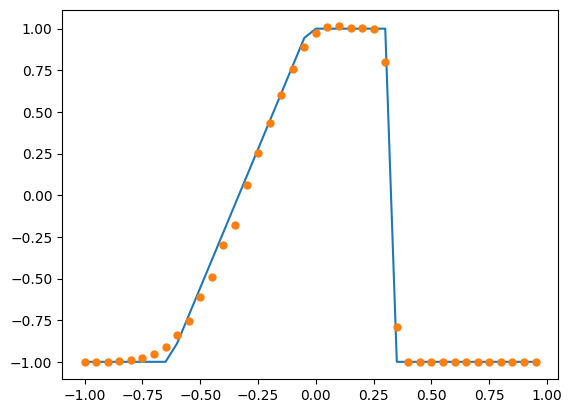

In [13]:
test = tst.Test5()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

## Ouverture
##### Une façon d'améliorer ces résultats aurait été dans un premier temps :
##### - abaisser la CFL afin d'avoir de meilleures garanties de stabilité en cas d'oscillations pour les premiers pas de temps. 
##### - pour réduire les oscillations, de prendre un temps final tfinal plus grand pour le schéma KT, comme ce schéma est TVD (source : Kurganov et Tadmor, 2000). 
##### - pour l'oscillation des tests 4 et 5 avec le schéma KT parabolique, cela pourrait être amélioré en raffinant la grille spatiale (le schéma devient alors plus coûteux).
##### - pour mieux reconstruire les schémas avec a constant, construire un nouveau schéma de type Lax-Wendroff (qui reconstruit très bien les schémas avec des évolutions spatiales douces) et utiliser un limiteur de flux pour coupler avec notre schéma KT qui permet de bien reconstruire les chocs et discontinuités.